### Introduction
This notebook focuses on the study of a medical phenomenon: heart failure. The dataset comprises observations from 299 patients, each characterized by 13 clinical features. Initially, we will explore the data, perform preprocessing, and clean it. Subsequently, various machine learning models will be employed to uncover relationships and hidden patterns, facilitating prediction and generalization. The following section provides a detailed description of the dataset.

* ##### Dataset:
Dataset Characteristics: Multivariate

Subject Area: Health and Medicine

Associated Tasks: Classification, Regression, Clustering

Feature Type: Integer, Real

Instances: 299

Features: 12

#### Data Exploration And Preprocessing:

In [61]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.utils import shuffle

In [9]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [10]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
data.shape

(299, 13)

In [12]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Check duplicates records**

In [14]:
data.duplicated().sum()

0

**Check null records**

In [15]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Display the corelation heat Map**

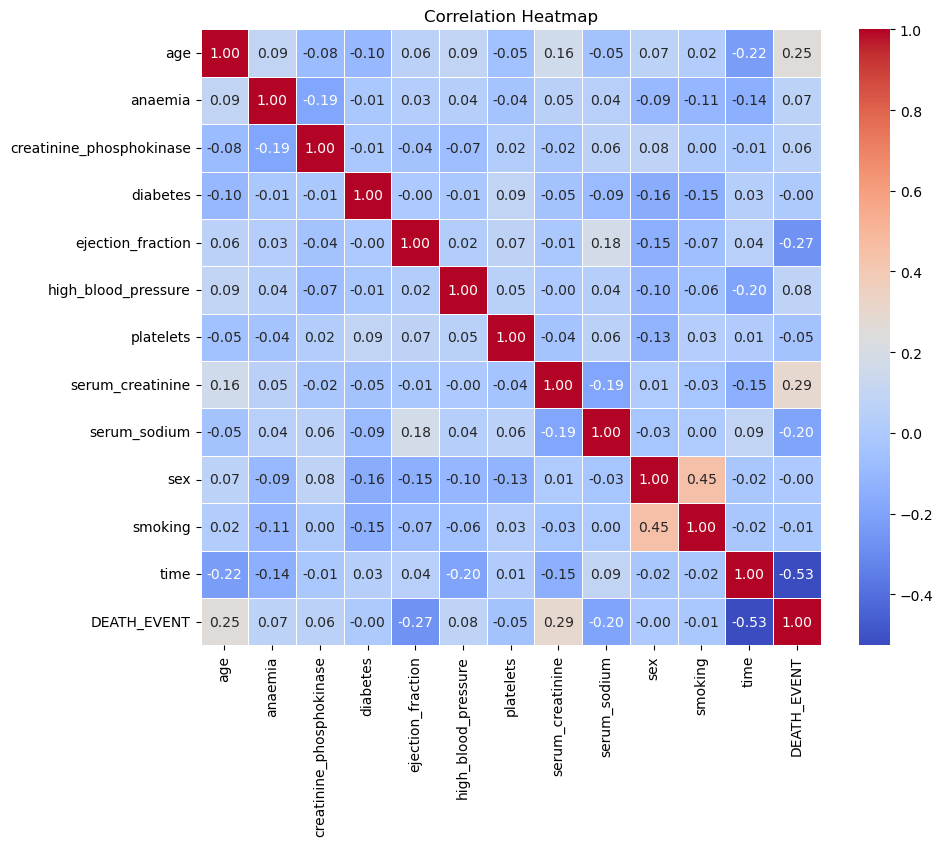

In [17]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* The correlation matrix reveals that the feature most strongly correlated with the target variable, Death_Event, is time, representing the follow-up period, albeit in a negative direction. Additionally, there's a correlation of 0.45 between the sex and smoking features, suggesting that men are more likely to smoke than women.
* Overall, the heatmap indicates that there isn't a significant correlation between features that may contribute to dementia-related issues. Given the relatively small dataset of 299 instances compared to 13 features, complex and latent correlations may exist. Moreover, the correlation of features with the target variable is not particularly strong, implying the presence of intricate and nuanced relationships within the data.

**Check outliers**

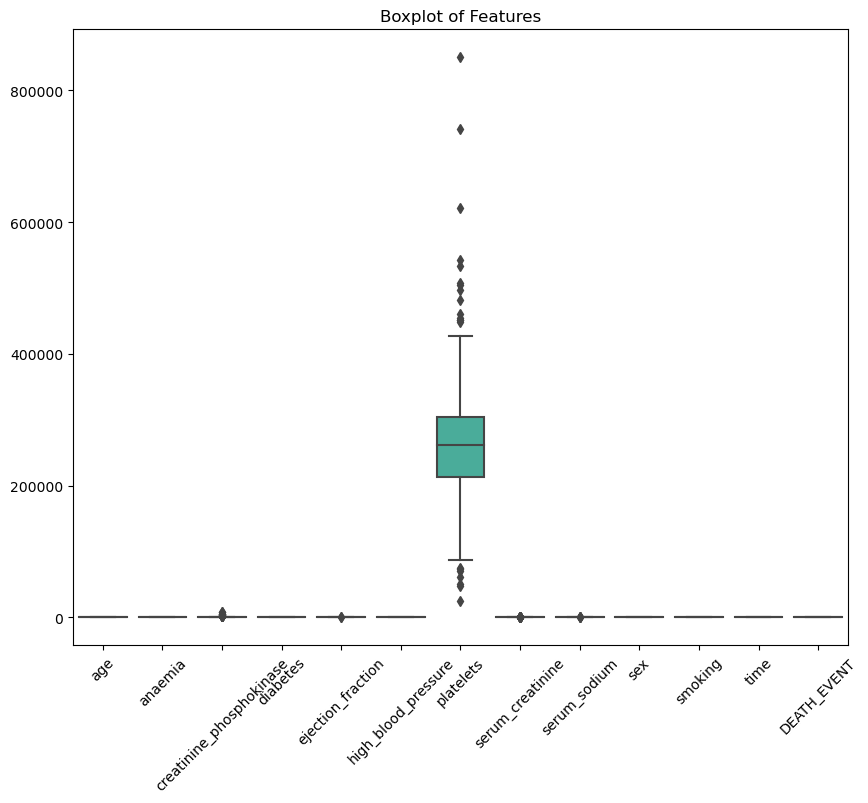

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of Features')
plt.show()

* To ensure consistent visualization across features with varying ranges, we first normalize the data.

**Normlize The Data**

In [28]:
# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
normalized_data = scaler.fit_transform(data)

normalized_data = pd.DataFrame(normalized_data, columns=data.columns)

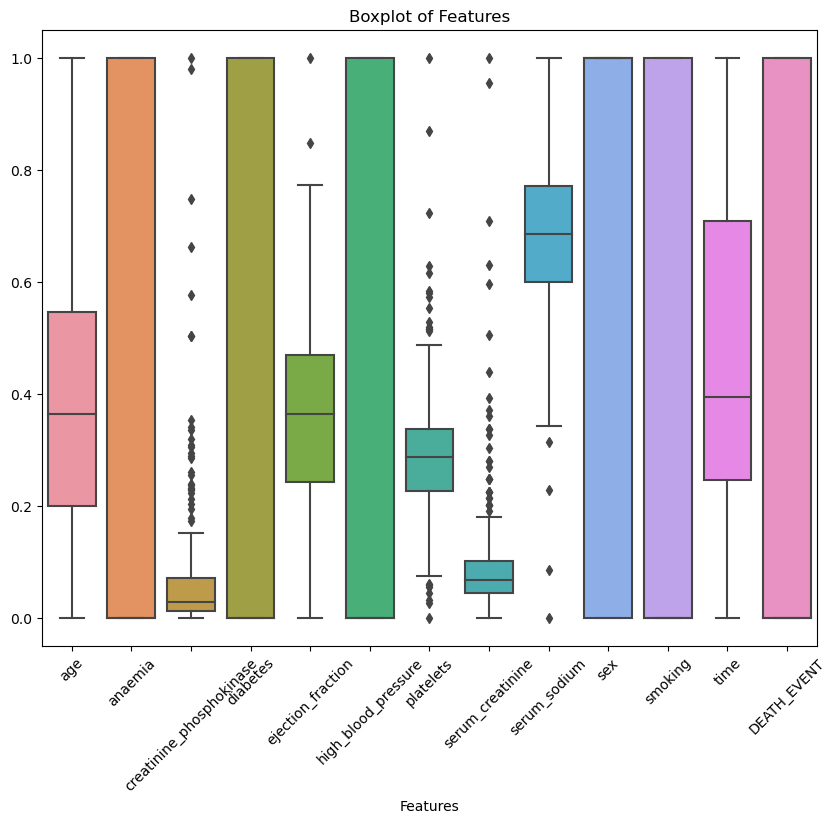

In [29]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=normalized_data)
plt.xticks(rotation=45)
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.show()


* The boxplots for creatinine, serum_creatinine, serum_sodium, and platelets indicate the presence of outliers

**Feature extraction with PCA**

In [38]:
Y = data['DEATH_EVENT']
X = data.drop(columns=['DEATH_EVENT'])

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, X_pca.shape[1]+1)])
X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1641.969406,-0.145905,-126.838452,8.660302,-18.291465,4.534997,-0.085902
1,1.766518,7279.254974,-118.588597,-2.082109,4.944131,2.322668,-0.447896
2,-101358.133289,-411.138654,-122.907106,14.552424,-9.070842,5.345130,-0.639521
3,-53358.143086,-457.772091,-122.790991,23.095645,3.078393,-2.290089,0.523977
4,63641.865204,-437.190782,-123.419571,15.833135,-11.488949,18.690441,0.261403


**Feature Selection**

#### Model Development

In [55]:
# Remove features with low variance


def remove_low_variance_features(X, threshold=0.1):
    selector = VarianceThreshold(threshold=threshold)
    X_filtered = selector.fit_transform(X)
    # Get selected features
    selected_features = X.columns[selector.get_support()]
    # Get removed features
    removed_features = X.columns[~selector.get_support()]
    # Convert back to DataFrame
    X_filtered = pd.DataFrame(X_filtered, columns=selected_features)
    return X_filtered, selected_features, removed_features


In [60]:
X_filtered, selected_features, removed_features = remove_low_variance_features(X)
X_filtered.head()
print('Selected feautres: ', selected_features)
print('Removed feautres: ', removed_features)

Selected feautres:  Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')
Removed feautres:  Index([], dtype='object')


**Split Data**

In [ ]:
X_train_shuffled, Y_train_shuffled = shuffle(X, Y, random_state=42)

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Xpca_train, Xpca_test, y_train, y_test = train_test_split(X_pca_df, Y, test_size=0.2, random_state=42)

In [46]:
# Define a list to store the results

results = []

# Define the parameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],  # Split strategy
    'max_depth': [None, 5, 10, 15],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
}

# Iterate through each split and dataset
for X_train, X_test, y_train, y_test, name in [(X_train, X_test, y_train, y_test, 'Original'),
                                                (Xpca_train, Xpca_test, y_train, y_test, 'extracted'),
                                                ]:
    # Create a Decision Tree classifier
    dt_classifier = DecisionTreeClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

    # Fit the grid search with preprocessed data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters found
    print(f"Best hyperparameters for {name}:", grid_search.best_params_)

    # Get the best model
    best_dt_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    y_pred = best_dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on {name} test set:", accuracy)

    # Store the results
    results.append((name, accuracy))

# Print the results
print("\nResults:")
for name, accuracy in results:
    print(f"{name} Accuracy: {accuracy}")


Best hyperparameters for Original: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy on Original test set: 0.7
Best hyperparameters for extracted: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy on extracted test set: 0.75

Results:
Original Accuracy: 0.7
extracted Accuracy: 0.75


In [50]:
# Split the data into training, validation, and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [51]:
# Create a dictionary of models

models = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
}

# Perform hyperparameter tuning using GridSearchCV
best_params = {}
best_scores = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Define parameter grid for each model
    param_grid = {}
    
    if name == 'Random Forest':
        param_grid = {'n_estimators': [10, 30, 50], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    elif name == 'AdaBoost':
        param_grid = {'n_estimators': [10, 30, 50], 'learning_rate': [0.1, 0.5, 1.0]}
    

    # Perform GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    # Get the best parameters
    best_params[name] = grid_search.best_params_

    # Get the best score
    best_scores[name] = grid_search.best_score_

    # Print the best parameters and best score
    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"Best score for {name}: {best_scores[name]:.4f}")

    # Make predictions on the validation set
    Y_val_pred = grid_search.predict(X_val)

    # Evaluate performance metrics on the validation set
    accuracy_val = accuracy_score(Y_val, Y_val_pred)
    

    # Print performance metrics on the validation set
    print(f"Validation Accuracy for {name}: {accuracy_val:.4f}")
 

    # Make predictions on the test set
    Y_test_pred = grid_search.predict(X_test)

    # Evaluate performance metrics on the test set
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
   

    # Print performance metrics on the test set
    print(f"Test Accuracy for {name}: {accuracy_test:.4f}")


Training Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best score for Random Forest: 0.8901
Validation Accuracy for Random Forest: 0.7111
Test Accuracy for Random Forest: 0.7778
Training AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Best score for AdaBoost: 0.8663
Validation Accuracy for AdaBoost: 0.7333
Test Accuracy for AdaBoost: 0.8000
